# Static ASL Recognition System
<hr>
<br>
<h1> Obtaining the Dataset </h1>
Importing the dataset from Kaggle <br>
<a href = "https://www.kaggle.com/datamunge/sign-language-mnist/"> Link to the dataset </a>

In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"xxxxxxxxxx","key":"xxxxxxxxxx"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [9]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!kaggle datasets list -s sign\ language

ref                                                          title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
datamunge/sign-language-mnist                                Sign Language MNIST                                31MB  2017-10-20 15:09:18          13574  
ardamavi/sign-language-digits-dataset                        Sign Language Digits Dataset                        8MB  2017-12-24 16:08:56           9113  
grassknoted/asl-alphabet                                     ASL Alphabet                                        1GB  2018-04-22 19:31:36           5733  
feronial/turkish-sign-languagefinger-spelling                Turkish Sign Language (Fingerspelling)            261MB  2018-05-16 10:04:28            157  
ksanzid/esharalipi-bangla-sign-language-dataset              Ishara-Li

In [12]:
!kaggle datasets download -d datamunge/sign-language-mnist -p /content

 29% 9.00M/30.8M [00:00<00:00, 65.0MB/s]
100% 30.8M/30.8M [00:00<00:00, 122MB/s] 


In [13]:
!unzip \*.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_train.csv    


# Building Model and Training
The CNN has the following layers:
<ul>
<li>3 Convolution Layers </li>
<li>2 MaxPooling Layers</li>
<li>3 Dense Layers</li>
<li>Dropout added to prevent overfitting</li>
</ul>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Activation,Convolution2D,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
train = pd.read_csv('sign_mnist_train.csv', header=0)
test = pd.read_csv('sign_mnist_test.csv',header=0)

y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [16]:
X_train[0]

array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
        165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
        170, 169],
       [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
        170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
        171, 170],
       [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
        172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
        171, 171],
       [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
        167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
        172, 171],
       [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
        156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
        172, 172],
       [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
        148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
        173, 173],
       [12

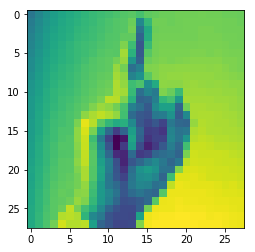

In [17]:
plt.imshow(X_train[0])
plt.show()

In [18]:
print('Training examples:',X_train.shape[0])
print('Test examples:',X_test.shape[0])

print('X_train shape"',X_train.shape)
print('y_train shape"',y_train.shape)
print('X_test shape"',X_test.shape)
print('y_test shape"',y_test.shape)

Training examples: 27455
Test examples: 7172
X_train shape" (27455, 28, 28)
y_train shape" (27455, 26)
X_test shape" (7172, 28, 28)
y_test shape" (7172, 26)


In [0]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

# Building the CNN model

In [0]:
keras.backend.clear_session()

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
                 input_shape=(28,28,1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 128)        

#Training
The model is trained for 50 epochs

In [25]:
model.fit(X_train, y_train, batch_size = 50, epochs = 50)
y_pred = model.predict(X_test)

Epoch 1/50
27455/27455 [==============================] - 4s 158us/step - loss: 0.1764 - acc: 0.9458
Epoch 2/50
27455/27455 [==============================] - 4s 152us/step - loss: 0.1221 - acc: 0.9606
Epoch 3/50
27455/27455 [==============================] - 4s 153us/step - loss: 0.0916 - acc: 0.9704
Epoch 4/50
27455/27455 [==============================] - 4s 152us/step - loss: 0.0870 - acc: 0.9741
Epoch 5/50
27455/27455 [==============================] - 4s 153us/step - loss: 0.0789 - acc: 0.9761
Epoch 6/50
27455/27455 [==============================] - 4s 155us/step - loss: 0.0689 - acc: 0.9795
Epoch 7/50
27455/27455 [==============================] - 4s 154us/step - loss: 0.0648 - acc: 0.9818
Epoch 8/50
27455/27455 [==============================] - 4s 155us/step - loss: 0.0564 - acc: 0.9836
Epoch 9/50
27455/27455 [==============================] - 4s 155us/step - loss: 0.0446 - acc: 0.9859
Epoch 10/50
27455/27455 [==============================] - 4s 155us/step - loss: 0.0490 - a

# Testing

In [27]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 6,  5, 10, ...,  2,  4,  2])

In [28]:
y_test = np.array(test['label'].values)
y_test
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9605409927495817

**The Model achieves an accuracy of 96.05% on the dataset**